In [ ]:
import os
os.chdir('../')

In [2]:
path_to_astro_seqs = "/Volumes/OTHERS/Doktorat/Essen"

In [3]:
import numpy as np
import pandas as pd
import cv2 as cv
import nrrd
import matplotlib.pyplot as plt
from tqdm import tqdm

from astrowaves.preprocessing.CalciumWaveTimeSpace import CalciumWaveTimeSpace

In [4]:
timespace = CalciumWaveTimeSpace()

image_matrix = timespace.create_time_space(''.join([path_to_astro_seqs, "/Con_AN_2_4/"]))

INFO:root:Detected 1200 image slices
INFO:root:Detected image shape of (608, 960) pixels
INFO:root:Merging images into 3d representation...
  0%|          | 0/1200 [00:00<?, ?it/s]

['single995.tif', 'single996.tif', 'single997.tif', 'single998.tif', 'single999.tif']


100%|██████████| 1200/1200 [00:39<00:00, 30.25it/s]
INFO:root:Done.


In [5]:
image_matrix = timespace.create_calcium_waves_map(image_matrix)

In [6]:
np.save('debug/debug_data/waves_norm.npy', image_matrix)

In [11]:
I = plt.imread(''.join([path_to_astro_seqs, "/Con_AN_2_4/", "single100.tif"]))

In [12]:
I.shape

(608, 960)

In [8]:
type(I[4,4])

numpy.ndarray

In [5]:
path_to_seq = ''.join([path_to_astro_seqs, "/Con_AN_2_4/"])

In [6]:
slices = [slic for slic in os.listdir(path_to_seq) if slic.endswith('.tif') and not slic.startswith('.')]
I = plt.imread(''.join([path_to_seq, slices[0]]))
arr = np.ndarray(shape=I.shape+(len(slices),), dtype='uint8')

In [7]:
for i, slic in enumerate(tqdm(slices)):
    arr[:, : , i] = plt.imread(''.join([path_to_seq, slices[i]]))

100%|██████████| 1200/1200 [00:31<00:00, 37.52it/s]


In [8]:
background = np.mean(arr, axis=2).astype('int16')
background = background.reshape(background.shape+(1,))

In [9]:
waves = np.ndarray(shape=arr.shape, dtype='int16')
waves = (arr-background)

In [10]:
waves_norm = np.ndarray(shape=arr.shape, dtype='int16')

In [11]:
minn = np.min(waves).astype('int16')
ptp = np.ptp(waves).astype('int16')

In [12]:
waves_norm = 255*((waves-minn)/ptp)

In [13]:
waves_norm = waves_norm.astype('uint8')

In [14]:
np.save('debug/debug_data/image_matrix.npy', arr)
np.save('debug/debug_data/background.npy', background)
np.save('debug/debug_data/waves.npy', waves)
np.save('debug/debug_data/waves_norm.npy', waves_norm)

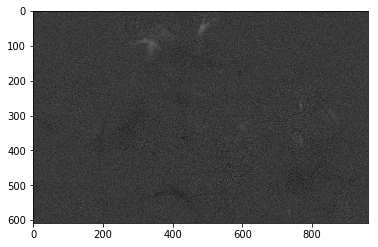

In [23]:
plt.imshow(waves_norm[:,:,500], cmap='gray', vmin=0, vmax=255)

In [28]:
waves_norm.shape

(608, 960, 1200)

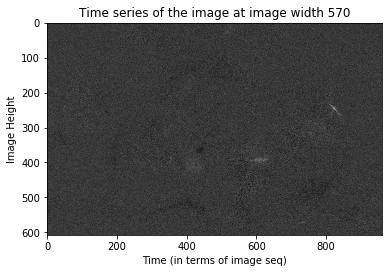

In [44]:
plt.imshow(waves_norm[:,:,430], cmap='gray', vmin=0, vmax=255)
plt.title('Time series of the image at image width 570')
plt.ylabel('Image Height')
plt.xlabel('Time (in terms of image seq)')
plt.savefig('debug/debug_data/3d_space_slice_prototype_1.png', bbox_inches='tight')

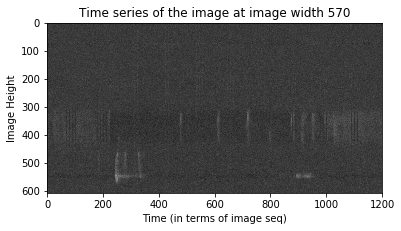

In [45]:
plt.imshow(waves_norm[:,200,:], cmap='gray', vmin=0, vmax=255)
plt.title('Time series of the image at image width 570')
plt.ylabel('Image Height')
plt.xlabel('Time (in terms of image seq)')
plt.savefig('debug/debug_data/3d_space_slice_prototype.png', bbox_inches='tight')

In [46]:
# alpha 0-1 lower contrast
# alpha < 1 higher contrast
# -127 < beta < 127
alpha = 1.2
beta = 0

In [ ]:
new_waves = alpha*waves_norm + beta
minn = np.min(new_waves).astype('int16')
ptp = np.ptp(new_waves).astype('int16')
waves_norm1 = 255*((waves-minn)/ptp)
waves_norm1 = waves_norm1.astype('uint8')

In [32]:
waves.max()

187.64166666666665

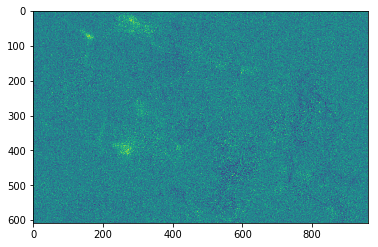

In [17]:
plt.imshow(waves_norm[:,:,220])

In [33]:
arr.shape

(608, 960, 1201)

In [16]:
I.shape

(608, 960)

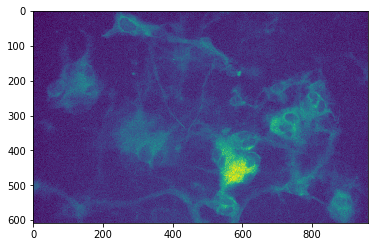

In [17]:
plt.imshow(I)